## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Read the dataset

In [2]:
pd.set_option('display.max_columns', 100)
encoding_latin = 'latin'
ice = pd.read_csv('D:/DataSets/Beer Recipe/recipeData.csv', low_memory = False, encoding = encoding_latin)
ice.head(9)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.0,NaN,NaN,NaN,5889.0
6,7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,1051.0
7,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,1.4,Specific Gravity,All Grain,NaN,NaN,corn sugar,4.2 oz,116.0
8,9,Chocolate Vanilla Porter,/homebrew/recipe/view/29265/chocolate-vanilla-...,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,34.76,30.28,75,1.042,73.0,NaN,Specific Gravity,All Grain,NaN,NaN,corn sugar,4 oz,116.0


## Exploratory Data Analysis

In [3]:
ice.shape

(73861, 23)

In [4]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73860 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

In [5]:
ice.describe().T

,count,mean,std,min,25%,50%,75%,max
BeerID,73861.0,36931.000000,21321.978453,1.000,18466.000,36931.000,55396.000,73861.0000
StyleID,73861.0,60.179432,56.811462,1.000,10.000,35.000,111.000,176.0000
Size(L),73861.0,43.929775,180.373492,1.000,18.930,20.820,23.660,9200.0000
OG,73861.0,1.406266,2.196908,1.000,1.051,1.058,1.069,34.0345
FG,73861.0,1.075865,0.432524,-0.003,1.011,1.013,1.017,23.4246
ABV,73861.0,6.136865,1.883510,0.000,5.080,5.790,6.830,54.7200
IBU,73861.0,44.276186,42.945508,0.000,23.370,35.770,56.380,3409.3000
Color,73861.0,13.404989,11.944511,0.000,5.170,8.440,16.790,186.0000
BoilSize,73861.0,49.724919,193.246427,1.000,20.820,27.440,30.000,9700.0000
BoilTime,73861.0,65.074870,15.024228,0.000,60.000,60.000,60.000,240.0000


In [6]:
ice.isnull().sum()

BeerID               0
Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

In [7]:
missing = round(100*(ice.isnull().sum()/len('BeerID')), 2)
missing

BeerID                 0.00
Name                  16.67
URL                    0.00
Style               9933.33
StyleID                0.00
Size(L)                0.00
OG                     0.00
FG                     0.00
ABV                    0.00
IBU                    0.00
Color                  0.00
BoilSize               0.00
BoilTime               0.00
BoilGravity        49833.33
Efficiency             0.00
MashThickness     497733.33
SugarScale             0.00
BrewMethod             0.00
PitchRate         654200.00
PrimaryTemp       377700.00
PrimingMethod    1118250.00
PrimingAmount    1151450.00
UserId            841500.00
dtype: float64

In [8]:
ice.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

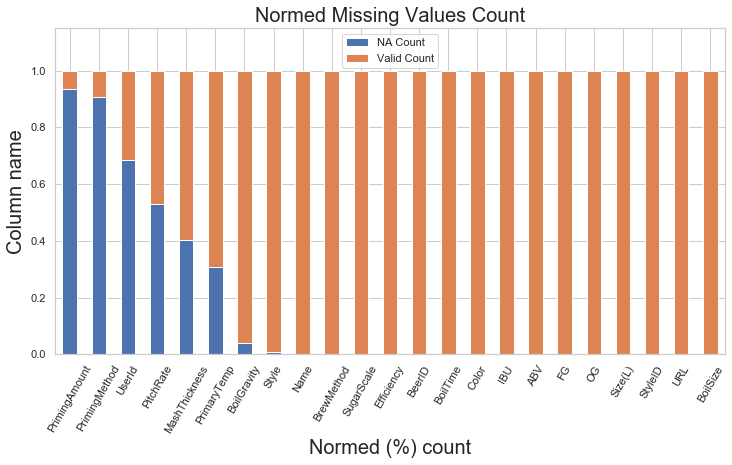

In [9]:
ice_missing = ice.copy()
ice_missing = ice_missing.T
true = ice_missing.isnull().sum(axis=1)
false = (len(ice_missing.columns) - true)
ice_missing['Valid Count'] = false / len(ice_missing.columns)
ice_missing['NA Count'] = true / len(ice_missing.columns)

ice_missing[['NA Count','Valid Count']].sort_values(
    'NA Count', ascending=False).plot.bar(
    stacked=True,figsize=(12,6))
plt.legend(loc=9)
plt.ylim(0,1.15)
plt.title('Normed Missing Values Count', fontsize=20)
plt.xlabel('Normed (%) count', fontsize=20)
plt.ylabel('Column name', fontsize=20)
plt.xticks(rotation=60)
plt.show()

ice = ice[pd.notnull(ice['Style'])]

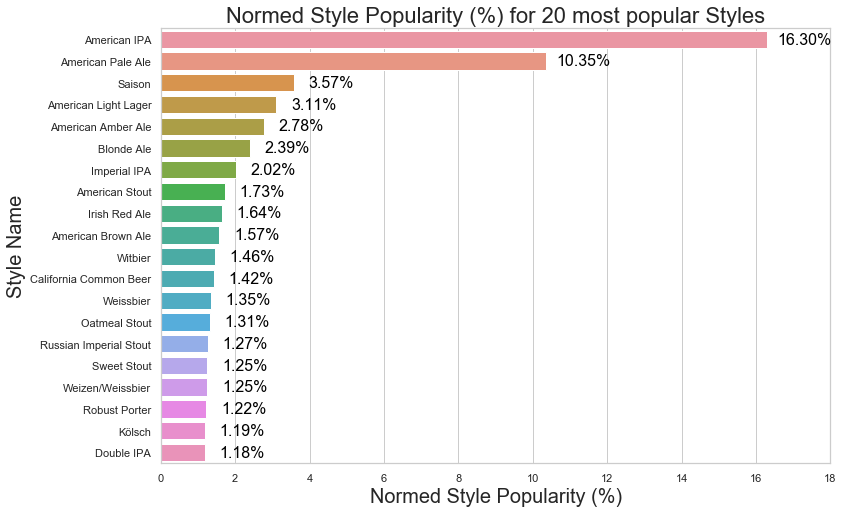

In [10]:
gb_style = ice.groupby(['Style']).count().sort_values(['BeerID'], ascending=False).reset_index()[:20]
gb_style['BeerID'] = (gb_style['BeerID'] / len(ice)) * 100

plt.figure(figsize=(12,8))
g = sns.barplot(x=gb_style['BeerID'], y=gb_style['Style'], orient='h')
plt.title('Normed Style Popularity (%) for 20 most popular Styles', fontsize=22)
plt.ylabel('Style Name', fontsize=20)
plt.xlabel('Normed Style Popularity (%)', fontsize=20)

plt.xlim(0,18)

for index, row in gb_style.iterrows():
    g.text(y=index+0.2,x=row['BeerID']+1,s='{:.2f}%'.format(row['BeerID']),
           color='black', ha="center", fontsize=16)

plt.show()

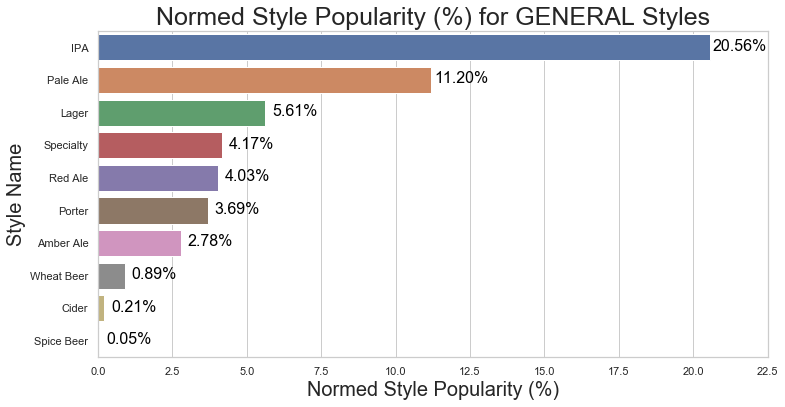

In [11]:
general_styles = ['Amber Ale','Pale Ale','Red Ale','Cider','Spice Beer',
                  'IPA','Lager','Specialty','Porter','Wheat Beer']
general_styles_dict = {'Brown':'Red','Fruit':'Spice', 'Stout':'Porter'}

ice_general_styles = ice.copy()
ice_general_styles['Style_aux'] = 'Other'
for style in general_styles:
    ice_general_styles.loc[ice_general_styles['Style'].str.contains(style), 'Style_aux'] = style
for key in general_styles_dict:
    ice_general_styles.loc[ice_general_styles['Style'].str.contains('{} Ale'.format(key)), 'Style_aux'] = '{} Ale'.format(general_styles_dict[key])

ice_general_styles = ice_general_styles[ice_general_styles['Style_aux']!='Other']
gb_style = ice_general_styles.groupby(['Style_aux']).count().sort_values(['BeerID'], ascending=False).reset_index()[:20]
gb_style['BeerID'] = (gb_style['BeerID'] / len(ice)) * 100

plt.figure(figsize=(12,6))
g=sns.barplot(x=gb_style['BeerID'], y=gb_style['Style_aux'], orient='h')
plt.title('Normed Style Popularity (%) for GENERAL Styles', fontsize=25)
plt.ylabel('Style Name', fontsize=20)
plt.xlabel('Normed Style Popularity (%)', fontsize=20)
plt.xlim(0,22.5)

for index, row in gb_style.iterrows():
    g.text(y=index+0.1,x=row['BeerID']+1,s='{:.2f}%'.format(row['BeerID']),
           color='black', ha="center", fontsize=16)

plt.show()

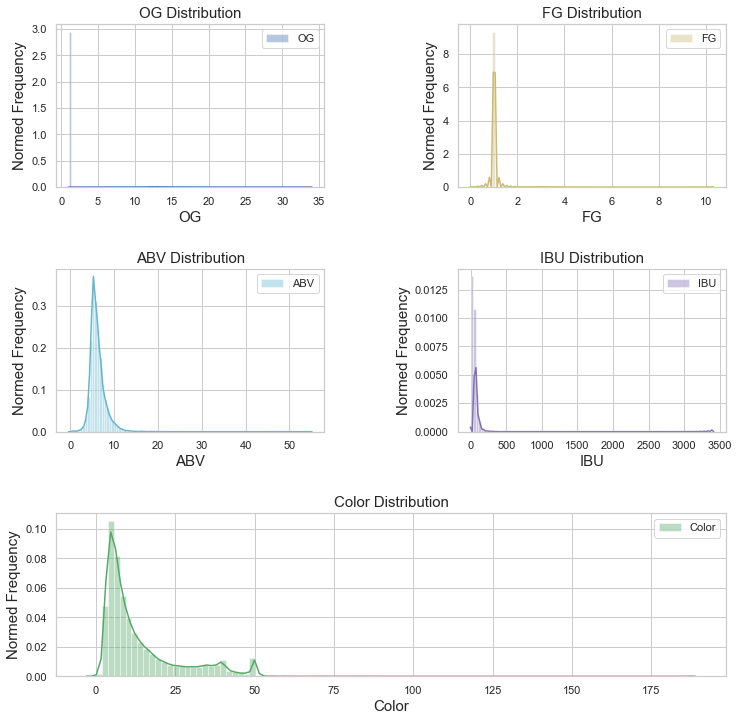

In [12]:
plt.figure(figsize=(12,12))
count=0
for col, color in zip(['OG', 'FG', 'ABV', 'IBU','Color'],['b','y','c','m','g']):
    count+=1
    if(count==5):
        plt.subplot(3,2,(5,6))
    else:
        plt.subplot(3,2,count)
    sns.distplot(ice[col], bins=100, label=col, color=color)
    plt.title('{} Distribution'.format(col), fontsize=15)
    plt.legend()
    plt.ylabel('Normed Frequency', fontsize=15)
    plt.xlabel(col, fontsize=15)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

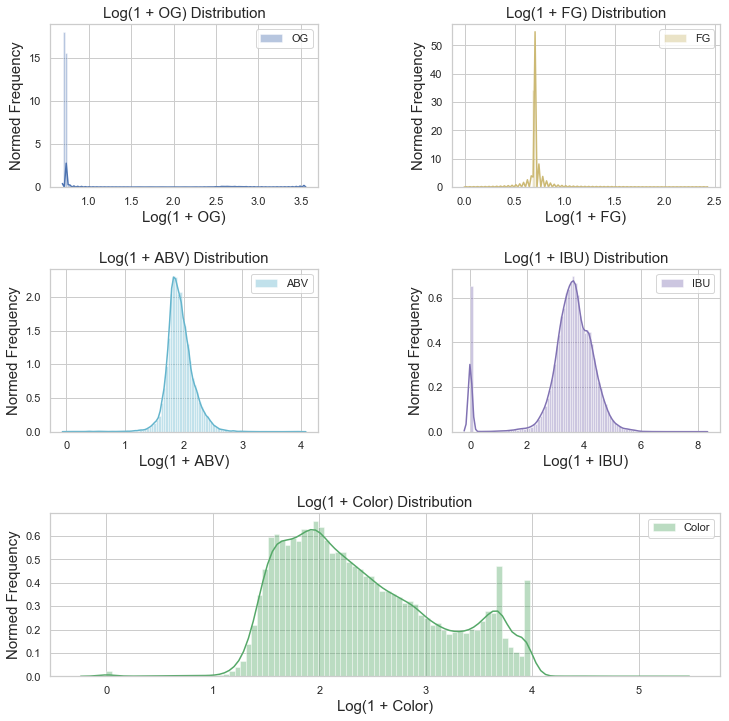

In [13]:
plt.figure(figsize=(12,12))
count=0
for col, color in zip(['OG', 'FG', 'ABV', 'IBU','Color'],['b','y','c','m','g']):
    count+=1
    if(count==5):
        plt.subplot(3,2,(5,6))
    else:
        plt.subplot(3,2,count)
    sns.distplot(np.log1p(ice[col]), bins=100, label=col, color=color)
    plt.title('Log(1 + {}) Distribution'.format(col), fontsize=15)
    plt.legend()
    plt.ylabel('Normed Frequency', fontsize=15)
    plt.xlabel('Log(1 + {})'.format(col), fontsize=15)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

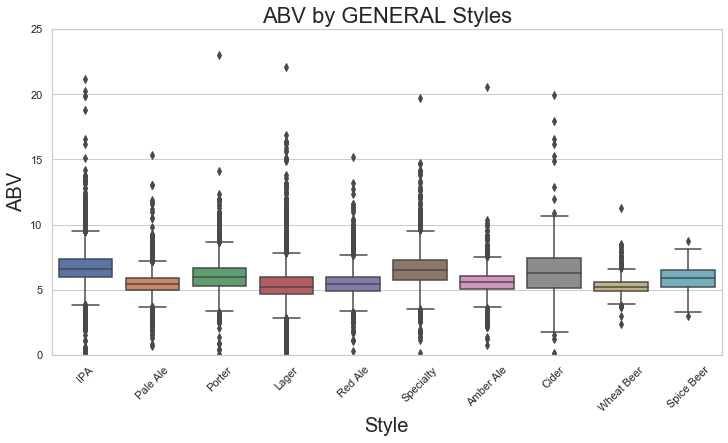

In [14]:
general_styles = ['Amber Ale','Pale Ale','Red Ale','Cider','Spice Beer',
                  'IPA','Lager','Specialty','Porter','Wheat Beer']
general_styles_dict = {'Brown':'Red','Fruit':'Spice', 'Stout':'Porter'}

ice_general_styles = ice.copy()
ice['Style_aux'] = 'Other'
for style in general_styles:
    ice_general_styles.loc[ice_general_styles['Style'].str.contains(style), 'Style_aux'] = style
for key in general_styles_dict:
    ice_general_styles.loc[ice_general_styles['Style'].str.contains('{} Ale'.format(key)), 'Style_aux'] = '{} Ale'.format(general_styles_dict[key])

plt.figure(figsize=(12,6))
sns.boxplot(ice_general_styles['Style_aux'], ice_general_styles['ABV'])
plt.xticks(rotation=45)
plt.ylim(0,25)
plt.title('ABV by GENERAL Styles', fontsize=22)
plt.xlabel('Style', fontsize=20)
plt.ylabel('ABV', fontsize=20)
plt.show()

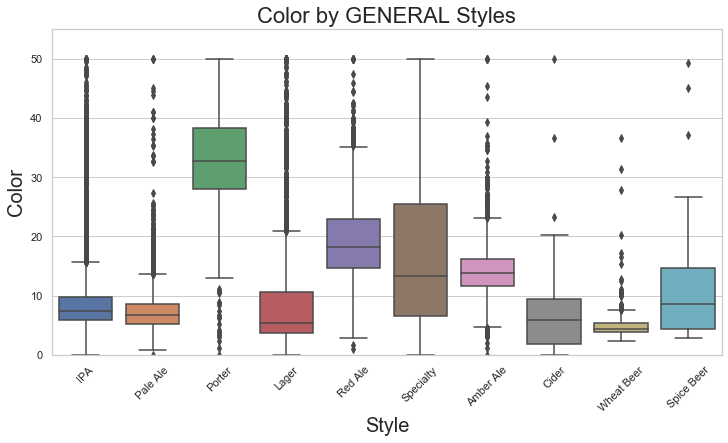

In [15]:
order = ice_general_styles.groupby('Style_aux')['Color'].median().fillna(0).sort_values()[::-1].index

plt.figure(figsize=(12,6))
sns.boxplot(ice_general_styles['Style_aux'], ice_general_styles['Color'])
plt.xticks(rotation=45)
plt.ylim(0,55)
plt.title('Color by GENERAL Styles', fontsize=22)
plt.xlabel('Style', fontsize=20)
plt.ylabel('Color', fontsize=20)
plt.show()

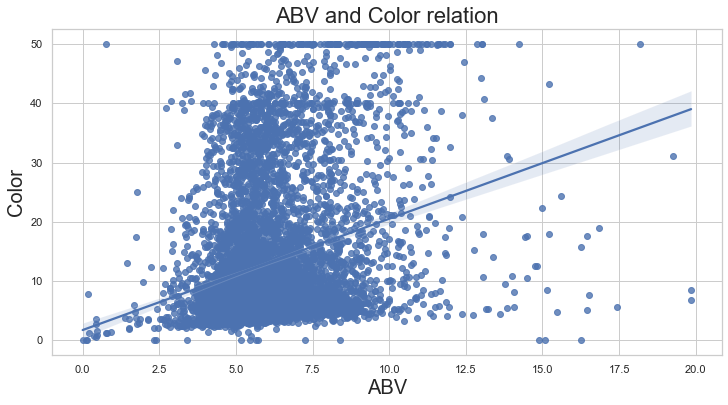

In [16]:
ice_abv_color = ice[(ice['ABV']<=20) & (ice['Color']<=50)]
ice_abv_color = ice_abv_color.sample(int(len(ice_abv_color)/10), random_state=42)

plt.figure(figsize=(12,6))
sns.regplot(ice_abv_color['ABV'],ice_abv_color['Color'])
plt.title('ABV and Color relation', fontsize=22)
plt.xlabel('ABV', fontsize=20)
plt.ylabel('Color', fontsize=20)
plt.show()

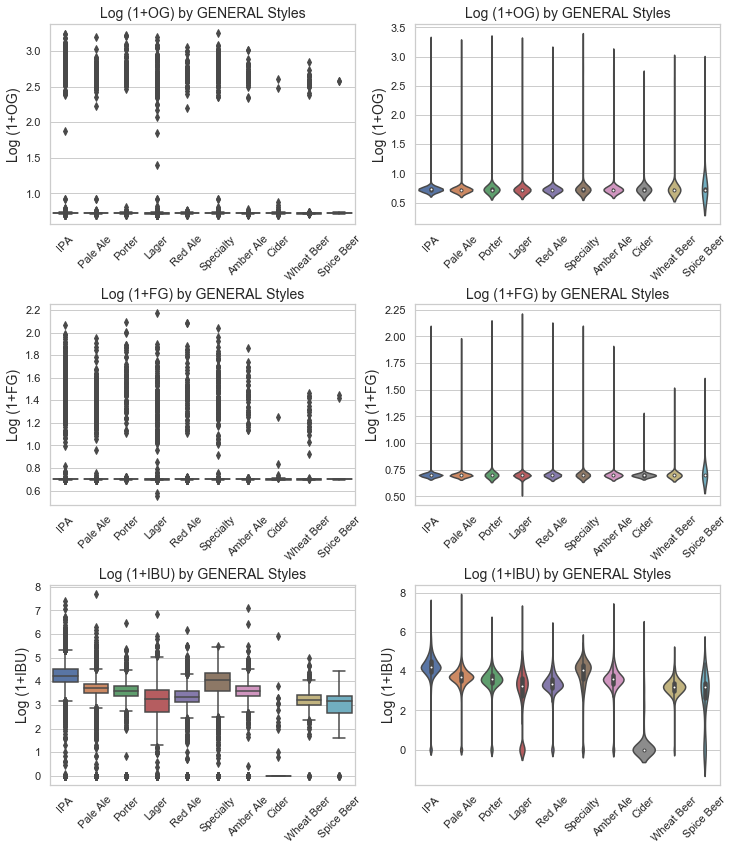

In [17]:
plt.figure(figsize=(12,14))
count=0    
for col in ['OG', 'FG', 'IBU']:
    for i in range(1,3):
        count+=1
        plt.subplot(3,2,count)

        if (i==1):
            sns.boxplot(ice_general_styles['Style_aux'], np.log1p(ice_general_styles[col]))
        else:
            sns.violinplot(ice_general_styles['Style_aux'], np.log1p(ice_general_styles[col]))
        plt.xticks(rotation=45)
        plt.title('Log (1+{}) by GENERAL Styles'.format(col), fontsize=14)
        plt.xlabel(' ')
        plt.ylabel('Log (1+{})'.format(col), fontsize=14)

plt.subplots_adjust(hspace=0.4)
plt.show()

No handles with labels found to put in legend.


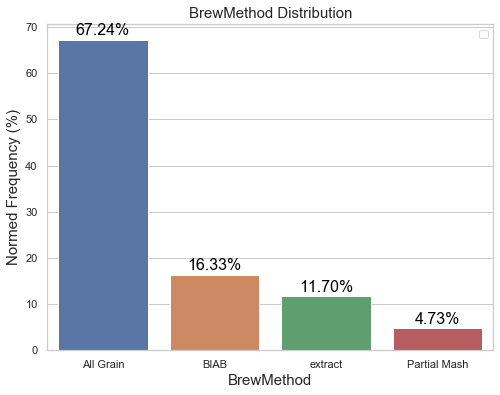

In [18]:
col= 'BrewMethod'
gb_brew_method = ice.groupby([col]).count().sort_values(['BeerID'], ascending=False).reset_index()[:20]
gb_brew_method['BeerID'] = (gb_brew_method['BeerID'] / len(ice)) * 100

plt.figure(figsize=(8,6))
g=sns.barplot(gb_brew_method[col], gb_brew_method['BeerID'])
plt.title('{} Distribution'.format(col), fontsize=15)
plt.legend()
plt.ylabel('Normed Frequency (%)', fontsize=15)
plt.xlabel(col, fontsize=15)

for index, row in gb_brew_method.iterrows():
    g.text(x=index,y=row['BeerID']+1,s='{:.2f}%'.format(row['BeerID']), 
           color='black', ha="center", fontsize=16)

plt.show()

No handles with labels found to put in legend.


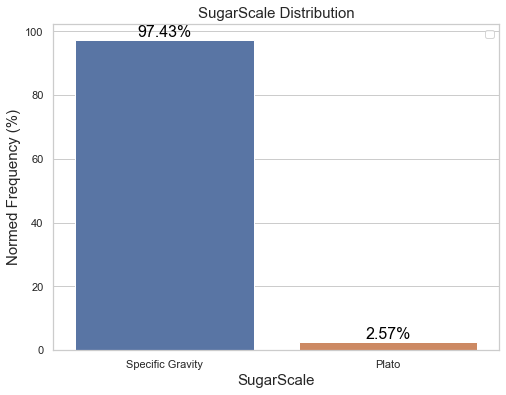

In [19]:
col = 'SugarScale'
gb_brew_method = ice.groupby([col]).count().sort_values(['BeerID'], ascending=False).reset_index()[:20]
gb_brew_method['BeerID'] = (gb_brew_method['BeerID'] / len(ice)) * 100

plt.figure(figsize=(8,6))
g=sns.barplot(gb_brew_method[col], gb_brew_method['BeerID'])
plt.title('{} Distribution'.format(col), fontsize=15)
plt.legend()
plt.ylabel('Normed Frequency (%)', fontsize=15)
plt.xlabel(col, fontsize=15)

for index, row in gb_brew_method.iterrows():
    g.text(x=index,y=row['BeerID']+1,s='{:.2f}%'.format(row['BeerID']), 
           color='black', ha="center", fontsize=16)

plt.show()

In [20]:
ice.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,Style_aux
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0,Other
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0,Other
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN,Other
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN,Other
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0,Other


In [21]:
ice.isnull().sum()

BeerID               0
Name                 1
URL                  0
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
PrimingMethod    66521
PrimingAmount    68511
UserId           50012
Style_aux            0
dtype: int64

In [22]:
ice.dtypes

BeerID             int64
Name              object
URL               object
Style             object
StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
UserId           float64
Style_aux         object
dtype: object

In [23]:
ice.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId', 'Style_aux'],
      dtype='object')

In [24]:
beer = ice.drop(['BeerID', 'Name', 'URL', 'Style', 'BrewMethod', 'PrimingMethod', 'PrimingAmount', 'UserId', 'Style_aux'], axis = 1)
beer.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp
0,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,NaN,17.78
1,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,NaN,NaN
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,NaN,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,NaN,NaN
4,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,NaN,19.00


In [25]:
beer1 = beer.fillna(beer.mean())
beer1.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp
0,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038000,70.0,2.124709,Specific Gravity,0.750452,17.780000
1,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070000,70.0,2.124709,Specific Gravity,0.750452,19.177332
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.352646,70.0,2.124709,Specific Gravity,0.750452,19.177332
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.352646,70.0,2.124709,Specific Gravity,0.750452,19.177332
4,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050000,72.0,2.124709,Specific Gravity,0.750452,19.000000


In [26]:
beer1.columns

Index(['StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize',
       'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness', 'SugarScale',
       'PitchRate', 'PrimaryTemp'],
      dtype='object')

In [28]:
beer1 = beer1.reindex(columns=['StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize',
       'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness',
       'PitchRate', 'PrimaryTemp', 'SugarScale'])

In [29]:
beer1.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,SugarScale
0,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038000,70.0,2.124709,0.750452,17.780000,Specific Gravity
1,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070000,70.0,2.124709,0.750452,19.177332,Specific Gravity
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.352646,70.0,2.124709,0.750452,19.177332,Specific Gravity
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.352646,70.0,2.124709,0.750452,19.177332,Specific Gravity
4,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050000,72.0,2.124709,0.750452,19.000000,Specific Gravity


In [27]:
'''from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
beer['SugarScale'] = lb.fit_transform(beer['SugarScale'])
beer.head()'''

"from sklearn.preprocessing import LabelEncoder\n\nlb = LabelEncoder() \nbeer['SugarScale'] = lb.fit_transform(beer['SugarScale'])\nbeer.head()"

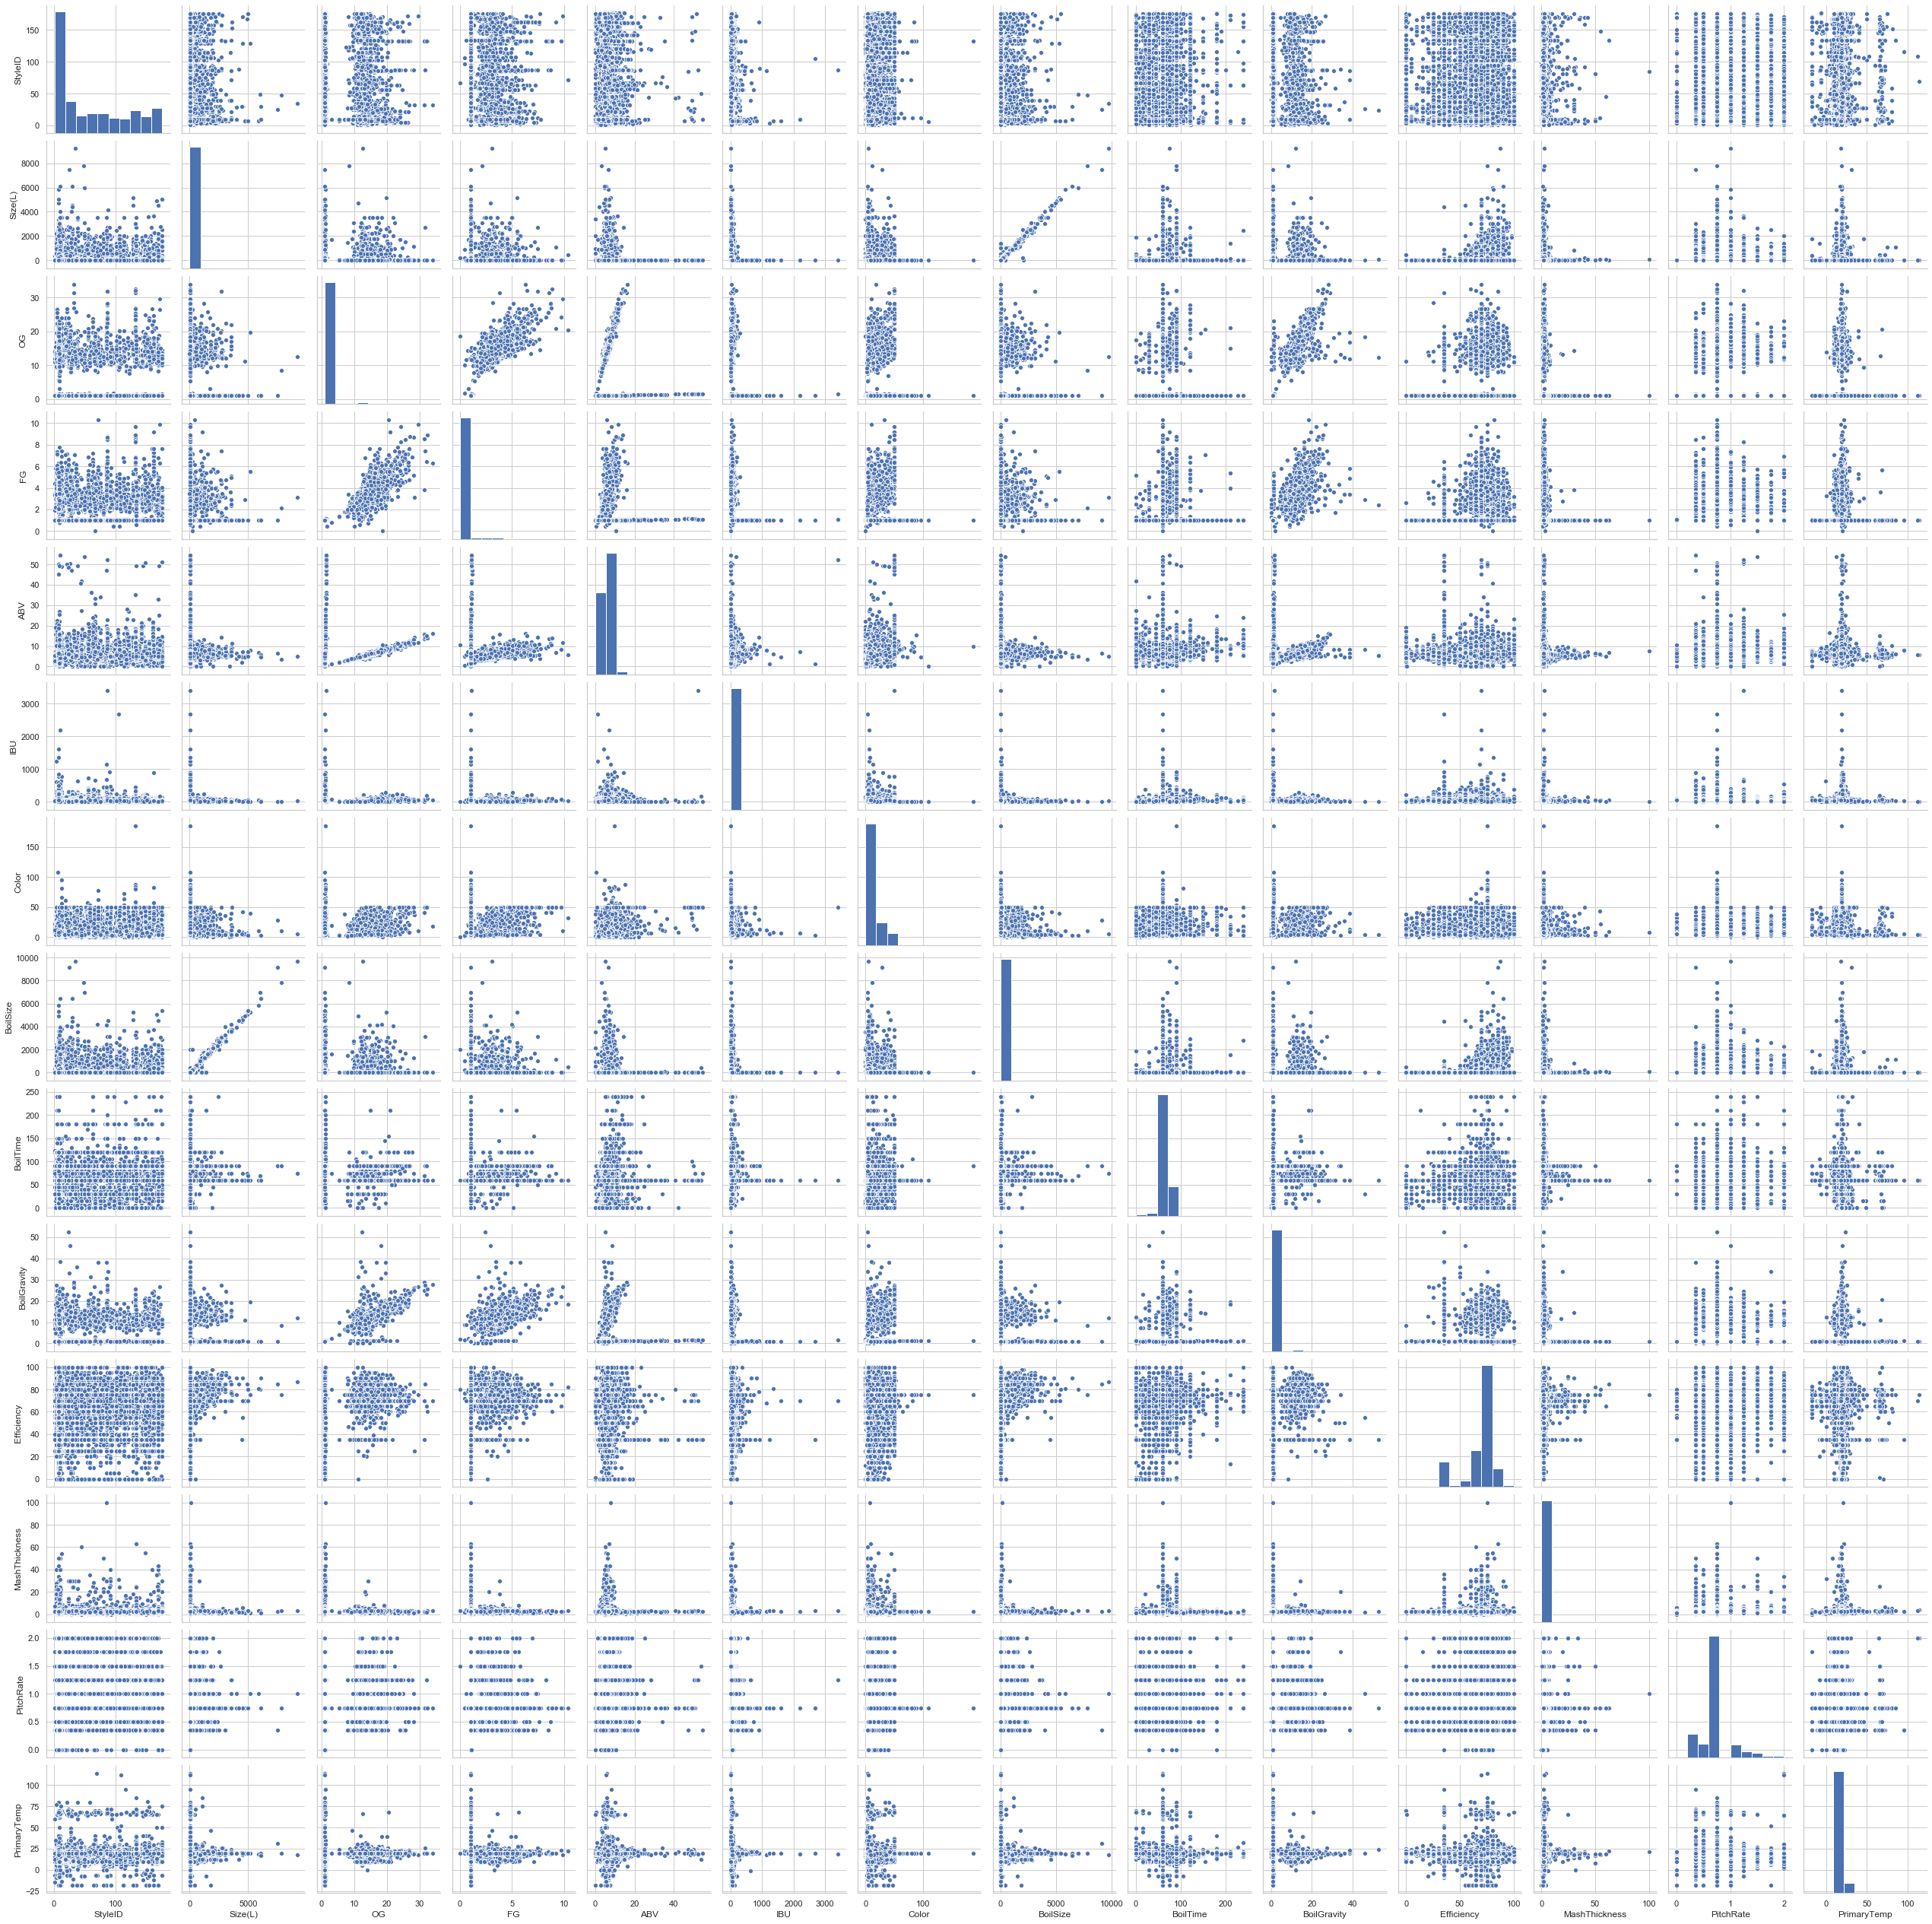

In [34]:
sns.pairplot(beer1)

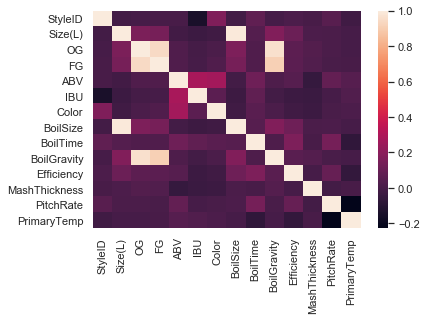

In [35]:
corr = beer1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## Train Test Split

In [37]:
X = beer1.iloc[:,:-1]
X.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
0,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038000,70.0,2.124709,0.750452,17.780000
1,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070000,70.0,2.124709,0.750452,19.177332
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.352646,70.0,2.124709,0.750452,19.177332
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.352646,70.0,2.124709,0.750452,19.177332
4,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050000,72.0,2.124709,0.750452,19.000000


In [38]:
y = beer1.iloc[:,14]
y.head()

0    Specific Gravity
1    Specific Gravity
2    Specific Gravity
3    Specific Gravity
4    Specific Gravity
Name: SugarScale, dtype: object

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [44]:
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 100)

## Model Building

In [45]:
from sklearn.svm import SVC

In [46]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Prediction from the Train Model

In [47]:
pred = model.predict(X_test)
pred

array(['Specific Gravity', 'Specific Gravity', 'Specific Gravity', ...,
       'Specific Gravity', 'Specific Gravity', 'Specific Gravity'],
      dtype=object)

## Import other Libraries

In [50]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

## Check the accuracy

In [51]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=pred))

accuracy: 0.9994085532302093 

[[  556    13]
 [    0 21411]]


## Classification Report

In [52]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test, pred))

                  precision    recall  f1-score   support

           Plato       1.00      0.98      0.99       569
Specific Gravity       1.00      1.00      1.00     21411

        accuracy                           1.00     21980
       macro avg       1.00      0.99      0.99     21980
    weighted avg       1.00      1.00      1.00     21980

